## Install dependencies

In [3]:
!pip install tensorflow

## Step 2: Import Libraries

In [2]:
#  Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

## Step 3: Load and Save California Housing dataset

In [18]:
# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
# Combine features and target into one DataFrame
df = X.copy()
df['target'] = y
df.to_csv(r"C:\Users\hp\Codveda Projects\Task 9 Neural Networks with TensorFlow-Keras\Data\california_housing.csv", index=False)

## Step 4: Train-test split

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Step 5: Feature scaling

In [6]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6: Build the Neural Network model

In [7]:
# Build the Neural Network model
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # Output layer for regression
])


C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 7: Compile the model

In [9]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mae"]
)


## Step 8: Train the model

In [10]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5213 - mae: 0.4950 - val_loss: 0.4660 - val_mae: 0.4625
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4139 - mae: 0.4382 - val_loss: 0.4199 - val_mae: 0.4708
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3513 - mae: 0.4182 - val_loss: 0.3610 - val_mae: 0.4192
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3438 - mae: 0.4130 - val_loss: 0.3924 - val_mae: 0.4368
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3378 - mae: 0.3982 - val_loss: 0.3381 - val_mae: 0.4041
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3250 - mae: 0.3978 - val_loss: 0.3634 - val_mae: 0.4162
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3110 - mae: 0.3872 - val_loss: 0.3304 - val_mae: 0.3883
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3127 - mae: 0.3847 - val_loss: 0.3223 - val_mae: 0.3885
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

## Step 9: Evaluate on test set

In [11]:
# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MAE: {test_mae:.4f}")


Test MAE: 0.3725


## Step 10: Plot training & validation loss curves

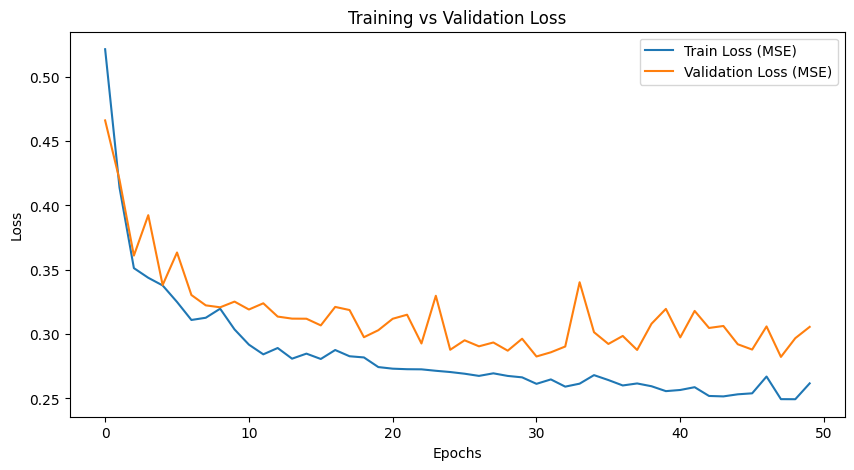

In [12]:
# Plot training & validation loss curves
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 9 Neural Networks with TensorFlow-Keras\Visuals\Training vs Validation Loss.png") 
plt.show()

## Step 11: Plot training & validation MAE curves

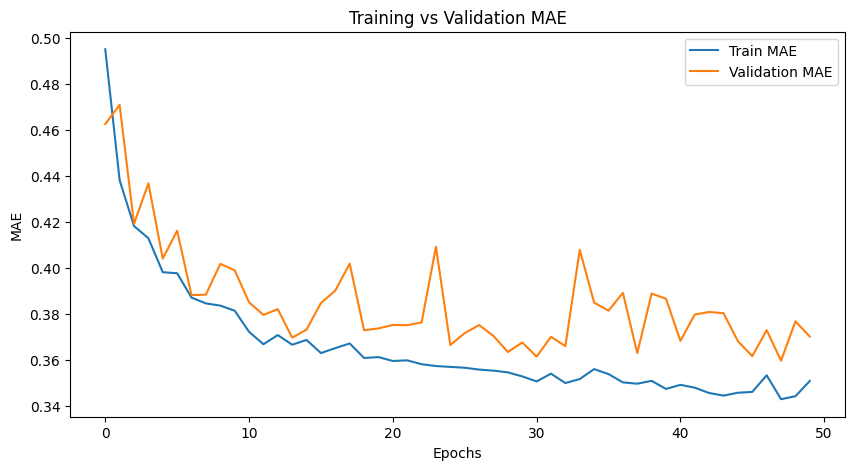

In [13]:
# Plot training & validation MAE curves
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.savefig(r"C:\Users\hp\Codveda Projects\Task 9 Neural Networks with TensorFlow-Keras\Visuals\Training vs Validation MAE.png") 
plt.show()

## Step 12: Make predictions

In [14]:
# Make predictions
y_pred = model.predict(X_test_scaled).flatten()


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## Step 13: Compare predictions vs actual values

In [15]:
# Compare predictions vs actual values
comparison_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(comparison_df.head(10))

    Actual  Predicted
0  0.47700   0.337101
1  0.45800   1.074414
2  5.00001   4.693326
3  2.18600   2.604511
4  2.78000   2.564190
5  1.58700   1.502855
6  1.98200   2.293527
7  1.57500   1.589728
8  3.40000   2.524431
9  4.46600   4.873623
